In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
!pip install mysql-connector-python



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import mysql.connector

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="mobile_classification"
)

print("Connected successfully!")


Connected successfully!


In [27]:
import os

os.makedirs("outputs/csv", exist_ok=True)
os.makedirs("outputs/excel", exist_ok=True)


In [28]:
!pip install xlsxwriter



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import xlsxwriter
print("xlsxwriter installed successfully")


xlsxwriter installed successfully


In [44]:
import warnings
warnings.filterwarnings("ignore")


In [45]:
import mysql.connector
import pandas as pd

# Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="mobile_classification"
)

queries = {
    "01_total_train": "SELECT COUNT(*) AS total_mobiles FROM mobile_train;",
    "02_total_test": "SELECT COUNT(*) AS total_mobiles FROM mobile_test;",
    "03_price_distribution": """
        SELECT price_range, COUNT(*) AS mobile_count
        FROM mobile_train
        GROUP BY price_range
        ORDER BY price_range;
    """,
    "04_avg_ram": """
        SELECT price_range, ROUND(AVG(ram), 2) AS avg_ram
        FROM mobile_train
        GROUP BY price_range;
    """,
    "05_avg_battery": """
        SELECT price_range, ROUND(AVG(battery_power), 2) AS avg_battery
        FROM mobile_train
        GROUP BY price_range;
    """,
    "06_top_ram": """
        SELECT ram, battery_power, price_range
        FROM mobile_train
        ORDER BY ram DESC
        LIMIT 5;
    """,
    "07_avg_internal_memory": """
        SELECT price_range, ROUND(AVG(int_memory), 2) AS avg_internal_memory
        FROM mobile_train
        GROUP BY price_range;
    """,
    "08_avg_resolution": """
        SELECT price_range, ROUND(AVG(px_height * px_width), 2) AS avg_resolution
        FROM mobile_train
        GROUP BY price_range;
    """,
    "09_high_ram_mobiles": """
        SELECT COUNT(*) AS high_ram_mobiles
        FROM mobile_train
        WHERE ram > (SELECT AVG(ram) FROM mobile_train);
    """,
    "10_long_battery": """
        SELECT COUNT(*) AS long_battery_mobiles
        FROM mobile_train
        WHERE battery_power > 4000;
    """,
    "11_avg_weight": """
        SELECT price_range, ROUND(AVG(mobile_wt), 2) AS avg_weight
        FROM mobile_train
        GROUP BY price_range;
    """,
    "12_train_vs_test_ram": """
        SELECT 'Train' AS dataset, ROUND(AVG(ram), 2) AS avg_ram FROM mobile_train
        UNION ALL
        SELECT 'Test' AS dataset, ROUND(AVG(ram), 2) AS avg_ram FROM mobile_test;
    """
}

# Excel writer
excel_path = "outputs/excel/mobile_sql_analysis.xlsx"
writer = pd.ExcelWriter(excel_path, engine="xlsxwriter")

for name, query in queries.items():
    df = pd.read_sql(query, conn)
    
    # Save CSV
    csv_path = f"outputs/csv/{name}.csv"
    df.to_csv(csv_path, index=False)
    
    # Save Excel sheet
    df.to_excel(writer, sheet_name=name[:31], index=False)
    
    print(f"Saved: {name}")

writer.close()
#conn.close()

print("\n✅ All SQL queries executed and exported successfully!")


Saved: 01_total_train
Saved: 02_total_test
Saved: 03_price_distribution
Saved: 04_avg_ram
Saved: 05_avg_battery
Saved: 06_top_ram
Saved: 07_avg_internal_memory
Saved: 08_avg_resolution
Saved: 09_high_ram_mobiles
Saved: 10_long_battery
Saved: 11_avg_weight
Saved: 12_train_vs_test_ram

✅ All SQL queries executed and exported successfully!


In [38]:
import mysql.connector
import pandas as pd

conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="mobile_classification"
)

print("Connection active")


Connection active


In [39]:
query = """
SELECT price_range, COUNT(*) AS mobile_count
FROM mobile_train
GROUP BY price_range
ORDER BY price_range;
"""

df_price_dist = pd.read_sql(query, conn)
df_price_dist


,price_range,mobile_count
0,0,500
1,1,500
2,2,500
3,3,500


In [40]:
query = """
SELECT price_range, ROUND(AVG(ram), 2) AS avg_ram
FROM mobile_train
GROUP BY price_range
ORDER BY price_range;
"""

df_avg_ram = pd.read_sql(query, conn)
df_avg_ram


,price_range,avg_ram
0,0,785.31
1,1,1679.49
2,2,2582.82
3,3,3449.23


In [41]:
query = """
SELECT price_range, ROUND(AVG(battery_power), 2) AS avg_battery
FROM mobile_train
GROUP BY price_range
ORDER BY price_range;
"""

df_avg_battery = pd.read_sql(query, conn)
df_avg_battery


,price_range,avg_battery
0,0,1116.90
1,1,1228.87
2,2,1228.32
3,3,1379.98


In [42]:
query = """
SELECT ram, battery_power, price_range
FROM mobile_train
ORDER BY ram DESC
LIMIT 5;
"""

df_top_ram = pd.read_sql(query, conn)
df_top_ram


,ram,battery_power,price_range
0,3998,1456,3
1,3996,584,3
2,3993,1166,3
3,3991,1035,3
4,3991,1567,3


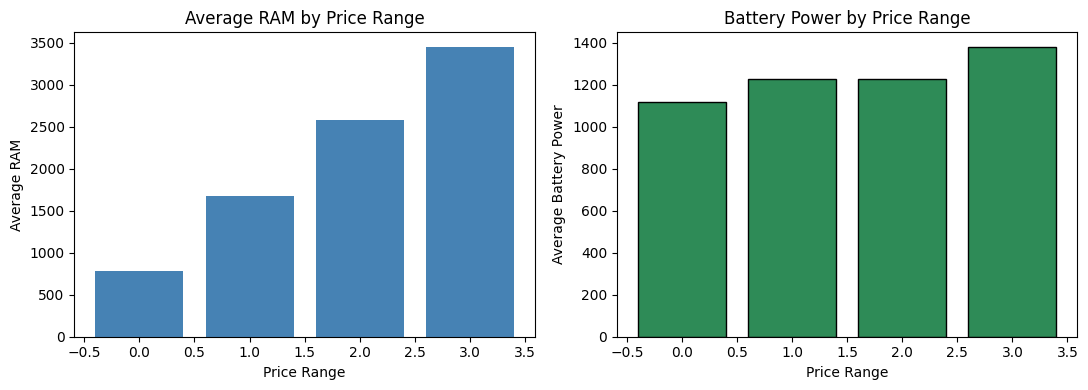

In [43]:
# Query 1: Average RAM by Price Range
query_ram = """
SELECT price_range, AVG(ram) AS avg_ram
FROM mobile_train
GROUP BY price_range
ORDER BY price_range;
"""

# Query 2: Average Battery Power by Price Range
query_battery = """
SELECT price_range, AVG(battery_power) AS avg_battery
FROM mobile_train
GROUP BY price_range
ORDER BY price_range;
"""

df_ram = pd.read_sql(query_ram, conn)
df_battery = pd.read_sql(query_battery, conn)

# Create subplots
plt.figure(figsize=(11, 4))

# 🔹 Subplot 1: RAM (Blue, solid)
plt.subplot(1, 2, 1)
plt.bar(
    df_ram['price_range'],
    df_ram['avg_ram'],
    color='steelblue'
)
plt.xlabel('Price Range')
plt.ylabel('Average RAM')
plt.title('Average RAM by Price Range')

# 🔹 Subplot 2: Battery (Green, edge styled)
plt.subplot(1, 2, 2)
plt.bar(
    df_battery['price_range'],
    df_battery['avg_battery'],
    color='seagreen',
    edgecolor='black',
    linewidth=1
)
plt.xlabel('Price Range')
plt.ylabel('Average Battery Power')
plt.title('Battery Power by Price Range')

plt.tight_layout()
plt.show()


In [46]:
conn.close()